In [6]:
import pandas as pd
import numpy as np
import os

def clean_data(input_file, output_file):
    # Load data
    if input_file.endswith('.csv'):
        df = pd.read_csv(input_file)
    else:
        df = pd.read_excel(input_file)

    print("Original Shape:", df.shape)

    # Standardize column names
    df.columns = df.columns.str.lower().str.replace(" ", "_")

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Handle missing values
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

    # Save cleaned data
    os.makedirs(os.path.dirname(output_file), exist_ok=True)
    df.to_csv(output_file, index=False)

    print("Cleaned Shape:", df.shape)
    print("Cleaned file saved successfully!")

if __name__ == "__main__":
    clean_data("/content/Uncleaned_DS_jobs.csv", "output/cleaned_data.csv")


Original Shape: (672, 15)
Cleaned Shape: (672, 15)
Cleaned file saved successfully!


/tmp/ipython-input-2154034748.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2154034748.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

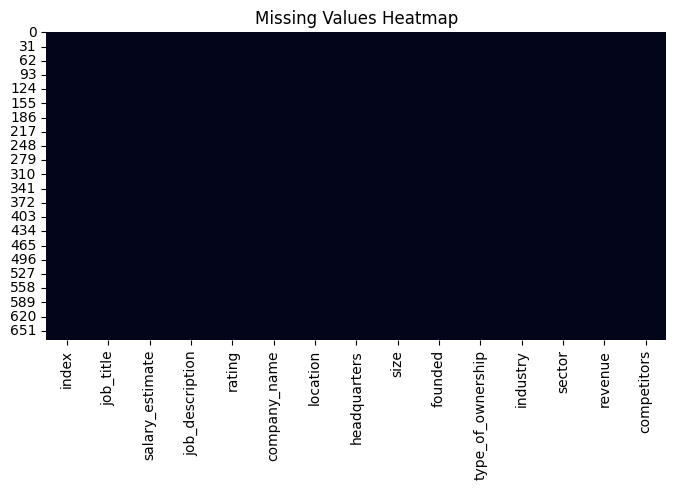

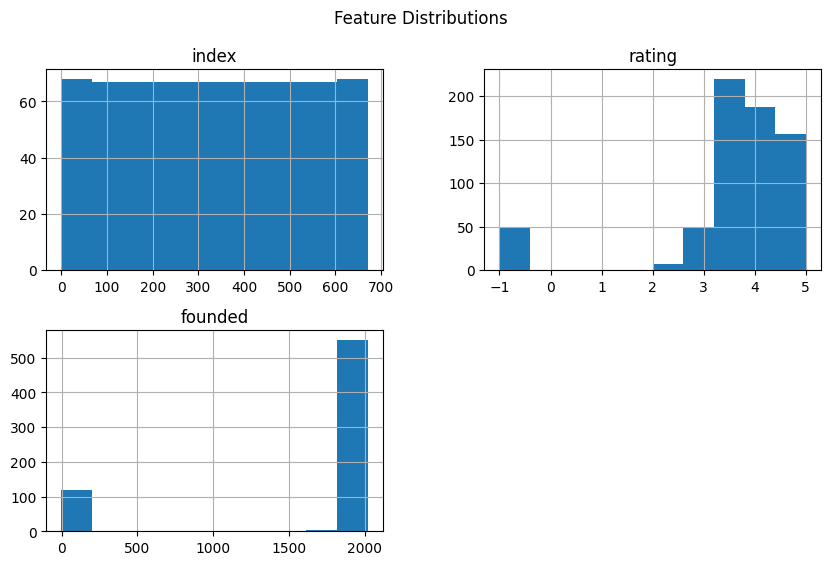

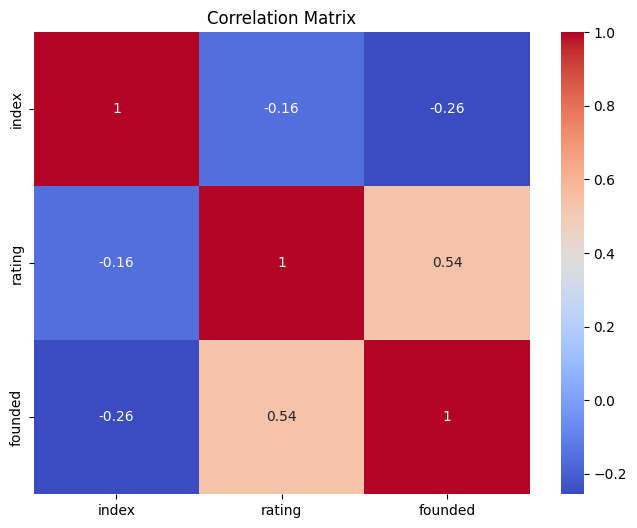

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load cleaned data
df = pd.read_csv("output/cleaned_data.csv")

# Create images folder
os.makedirs("images", exist_ok=True)

# 1️⃣ Missing Values Heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.savefig("images/missing_values.png")
plt.show()

# 2️⃣ Numeric Feature Distributions
df.select_dtypes(include='number').hist(figsize=(10,6))
plt.suptitle("Feature Distributions")
plt.savefig("images/distributions.png")
plt.show()

# 3️⃣ Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig("images/correlation.png")
plt.show()